In [28]:
# import libraries
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting

df = pd.read_csv('YellowstoneRiverQ.csv', names=['Y','M','D','Q'], skiprows=1)

# look at the first 20 rows to make sure data is correctly imported and stored
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,M,D,Q
0,2007,10,1,34.264634
1,2007,10,2,34.547813
2,2007,10,3,35.397350
3,2007,10,4,36.813243
4,2007,10,5,39.361853
5,2007,10,6,42.476819
6,2007,10,7,45.308607
7,2007,10,8,41.910462
8,2007,10,9,40.777747
9,2007,10,10,40.777747


In [29]:
# set Y,M,D to serial date for plotting
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')

# Here's what the first and last 10 records of the modified dataframe looks like
df.iloc[qrows,:]

#print(df)

,Y,M,D,Q,SerDates
0,2007,10,1,34.264634,2007-10-01
1,2007,10,2,34.547813,2007-10-02
2,2007,10,3,35.397350,2007-10-03
3,2007,10,4,36.813243,2007-10-04
4,2007,10,5,39.361853,2007-10-05
5,2007,10,6,42.476819,2007-10-06
6,2007,10,7,45.308607,2007-10-07
7,2007,10,8,41.910462,2007-10-08
8,2007,10,9,40.777747,2007-10-09
9,2007,10,10,40.777747,2007-10-10


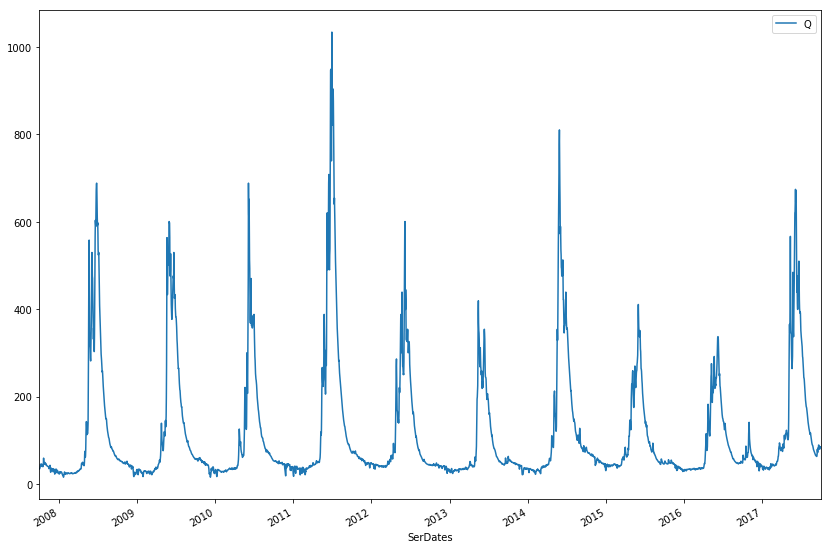

In [30]:
## Plot the data ##
#fig = plt.figure()
df.plot(x="SerDates", y="Q",figsize=(14,10))
plt.show()

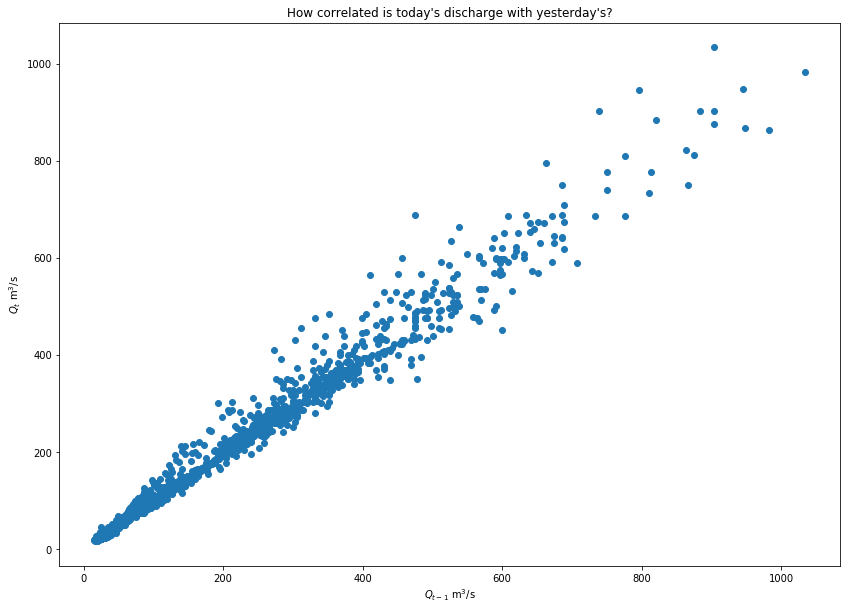

In [22]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
Q = df['Q'].values 

# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Qt   = Q[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Qtm1 = Q[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtm1,Qt,'o')
plt.title('How correlated is today\'s discharge with yesterday\'s?')
plt.xlabel('$Q_{t-1}$ m$^3$/s')
plt.ylabel('$Q_t$ m$^3$/s')
plt.show()

In [24]:
# save as a 'pickle' file
df.to_pickle('YellowstoneRiverQ_2007-2017.pkl')